# Банк — cегментация пользователей по потреблению

Анализ данных о клиентах Метанпромбанка

**Материалы:**
    - Презентация: https://yadi.sk/i/xDD3pcu3arBkqA

**Задачи:**
    - Провести исследовательский анализ данных;
    - Сегментировать пользователей по количеству потребляемых продуктов;
    - Проверить гипотезу различия дохода между клиентами, пользующимися двумя продуктами банка, и клиентами, пользующимся одним продуктом банка.
    
**Гипотеза:** Клиенты, пользующимися двумя продуктами банка имеют больший доход, чем клиенты пользующимся одним продуктом банка.

**Этапы работы:**
    - Подготовка
    - Предобработка данных
        - Проверка на соответствие типов данных
        - Проверка корректности наименований колонок
        - Проверка на пропущенные значения
        - Проверка на дубликаты
    - Исследовательский анализ данных
        - Исследование распределения данных
        - Исследование популярности различных продуктов банка
        - Исследование зависимости дохода и собственности от возраста и пола клиента
        - Исследование популярности кредитных карт в зависимости от дохода и возраста
    - Сегментация пользователей по количеству потребляемых продуктов
    - Проверка гипотезы
    - Вывод

### Оглавление:

[1. Подготовка к исследованию](#section0)  
[2. Предобработка данных](#section1)  
[3. Исследовательский анализ данных](#section2)  
[4. Сегментация пользователей по количеству потребляемых продуктов](#section3)  
[5. Модель прогнозирования оттока пользователей](#section4)  
[6. Проверка гипотезы](#section5)  
[Вывод](#section6)  

## 1. Подготовка к исследованию
<a id='section0'> <a/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/My Drive/yandex.practicum projects/datasets/13. Final project Bank/'

bank_data = pd.read_csv(path + 'bank_dataset.csv')
display(bank_data.head())
bank_data.info()

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Данный этап подготовительный, мы импортировали библиотеки, загрузили датайфрейм с информацией о клиентах банка и ознакомились с ним.

## 2. Предобработка данных
<a id='section1'> <a/>

**2.1 Проверка на соответствие типов данных**

In [4]:
display(bank_data.head(3))
display(bank_data.dtypes)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1


userid                int64
score                 int64
City                 object
Gender               object
Age                   int64
Objects               int64
Balance             float64
Products              int64
CreditCard            int64
Loyalty               int64
estimated_salary    float64
Churn                 int64
dtype: object

Все типы данных корректны, на данном этапе изменений не требуется

**2.2 Проверка корректности наименований колонок**

Наименования столбцов начинаются как со строчных, так и с заглавных букв. Приведем их к единообразию

In [5]:
# Приведение названий столбцов к нижнему регистру
bank_data.columns = bank_data.columns.str.lower()

# Проверка резульатата
bank_data.head(1)

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1


**2.3 Проверка на дубликаты**

In [6]:
# Проверка на дубликаты с исключенным 'userid'
bank_data.drop('userid', axis=1).duplicated().sum()

0

Как мы видим, пропусков нет даже с исключенным номером 'userid' (во избежания ошибки присвоения одному пользвателю 2 id)

**2.4 Проверка на пропущенные значения**

In [7]:
# Проверка на пропуски в столбцах
display(bank_data.isna().sum())

userid                 0
score                  0
city                   0
gender                 0
age                    0
objects                0
balance             3617
products               0
creditcard             0
loyalty                0
estimated_salary       0
churn                  0
dtype: int64

Нашлось 3617 пропуска в столбце 'balance' (из 10000 строк). Посмотрим внимательнее

In [8]:
bank_data_isna = bank_data[bank_data['balance'].isna() == True].reset_index(drop=True)

bank_data_isna.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
2,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
3,15779909,497,Рыбинск,М,24,3,NaN,2,1,0,76390.01,0
4,15675000,476,Ярославль,Ж,34,10,NaN,2,1,0,26260.98,0


В глаза бросается, что в первых 10 строках всего 2 города: Ярославль и Рыбинск. Проверим, есть ли другие

In [9]:
print('Города с пропусками:')
print(bank_data_isna['city'].unique())
print()
print('Все уникальные города в представленных данных:')
print(bank_data['city'].unique())

Города с пропусками:
['Ярославль' 'Рыбинск']

Все уникальные города в представленных данных:
['Ярославль' 'Рыбинск' 'Ростов Великий']


Нет, все верно, пропуски соответсвтвуют только Ярославлю и Рыбинску, видимо это техническая ошибка о которой стоит сообщить. Теперь проверим, есть ли вообще данные в колонке 'balance' у этих городов

In [10]:
len(bank_data[(bank_data['balance'].isna() == False) &
           ((bank_data['city'] == 'Ярославль') |
            (bank_data['city'] == 'Рыбинск'))])

3874

Отлично, у Ярославля и Рыбинска все же есть строки без пропусков. Теперь можно подумать, как заполнить недостающие данные

In [11]:
# Разделить выборки (с пропусками и без)
# Датасет без пропусков
bank_data_dropna = bank_data.dropna().reset_index(drop=True)
# Датасет с пропусками уже создан - bank_data_isna

In [12]:
# Преобразование строковых значений столбцов 'city' и 'gender' в числовые
encoder =  LabelEncoder()

bank_data_dropna['city'] = encoder.fit_transform(bank_data_dropna['city']) 
bank_data_dropna['gender'] = encoder.fit_transform(bank_data_dropna['gender']) 

bank_data_isna['city'] = encoder.fit_transform(bank_data_isna['city']) 
bank_data_isna['gender'] = encoder.fit_transform(bank_data_isna['gender']) 

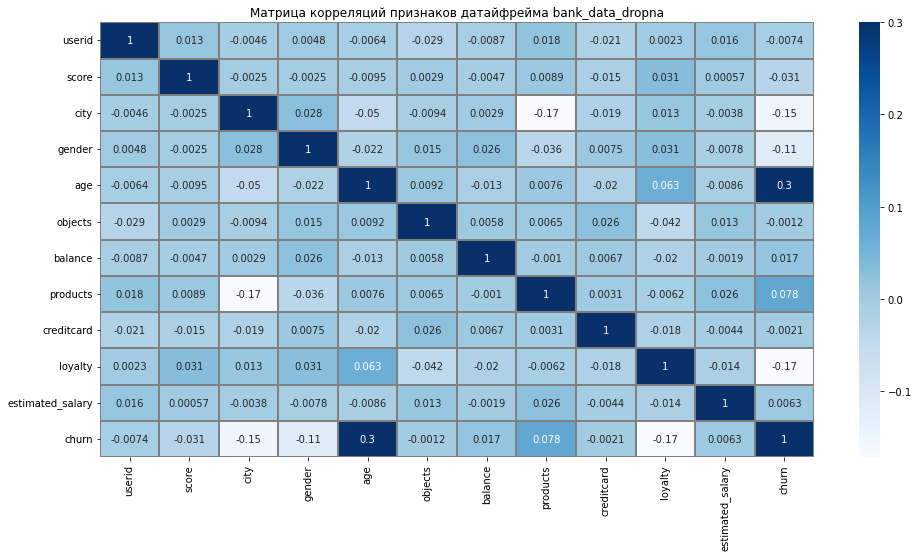

In [13]:
# Тепловая карта матрицы корреляций
plt.figure(figsize=(16,8))
plt.title('Матрица корреляций признаков датайфрейма bank_data_dropna')
sns.heatmap(bank_data_dropna.corr(), annot=True, linewidths=1, vmax=0.3, linecolor='gray', cmap='Blues')
plt.show()

На удивление каких либо значимых зависимостей, за исключением зависимости между возрастом клиента и оттоком нет. Слабо выделяются так же зависимость между городом клиента и количеством используемых продуктов банка, между городом и вероятностью оттока, а также между полом и вероятностью оттока.

In [14]:
# Матрица признаков X
X = bank_data_dropna.drop(['balance', 'userid'], axis=1)
# Целевая переменная y
y = bank_data_dropna['balance']

# Разделение выборки на обучающую и валидационную. Отношение 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация данных методом StandartScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [15]:
model = LinearRegression()
# обучение модели
model.fit(X_train_st, y_train)
# прогнозирование на тестовой выборке
predictions = model.predict(X_test_st)

def mean_absolute_percentage_error(y_true, y_pred): 
    '''
    Функция для расчета MAPE
    '''
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# выведем основные метрики
print('MAE: {:.2f}'.format(mean_absolute_error(y_test, predictions))) # Средний модуль ошибки
print('MSE: {:.2f}'.format(mean_squared_error(y_test, predictions))) # Средняя квадратичная ошибка
print('MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test, predictions))) # Средняя относительная ошибка по модулю

display(pd.Series(predictions).describe())

MAE: 24349.05
MSE: 955893409.18
MAPE: 25.01


count      1277.000000
mean     120073.068534
std        1610.535178
min      113988.719760
25%      118990.508595
50%      120113.184507
75%      121234.997199
max      125344.417290
dtype: float64

Получился странный результат. Между минимальным и максимальным значением разница всего около 10%, а стандартное отклонение очень маленькое. Посмотрим на тестовую выборку

In [16]:
pd.Series(y_test).describe()

count      1277.000000
mean     118831.155278
std       30835.801374
min       14262.800000
25%       98186.700000
50%      118536.400000
75%      138521.830000
max      212696.320000
Name: balance, dtype: float64

Здесь разброс значительно больший, что и должно соответствовать реальности. Между минимальным и максимальным значениями разница в 1491%, а стандартное отклонение достаточно большое. При этом разница между средними значениями минимальна. Посмотрем на распределение предсказанных и тестовых значений.

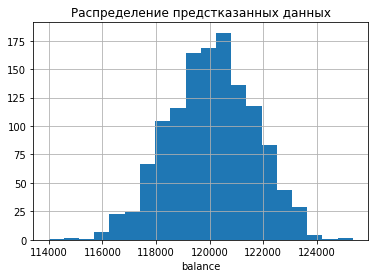

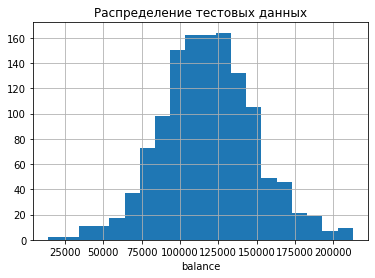

In [17]:
pd.Series(predictions).hist(bins=20)
plt.title('Распределение предстказанных данных')
plt.xlabel('balance')
plt.show()

y_test.hist(bins=20)
plt.title('Распределение тестовых данных')
plt.xlabel('balance')
plt.show()


Как мы видим, в обоих случаях распределение нормальное, но разброс тестовой выборки значительно больше, как мы и увидели раньше. Возможно что-то может подсказать график зависимости между балансом пользователя с его заработной платой и количеством имущества, как наиболее близкие между собой показатели.

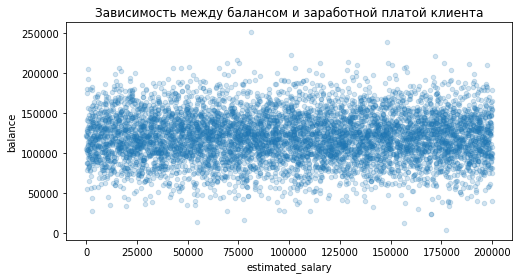

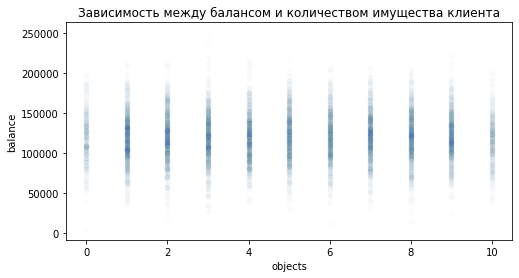

In [18]:
# Графики построены на очищенных от пропусков данных bank_data_dropna
bank_data_dropna.plot(kind='scatter',
                      x='estimated_salary',
                      y='balance',
                      figsize=(8,4),
                      alpha=0.2)
plt.title('Зависимость между балансом и заработной платой клиента')
plt.show()

bank_data_dropna.plot(kind='scatter',
                      x='objects',
                      y='balance',
                      figsize=(8,4),
                      alpha=0.01)
plt.title('Зависимость между балансом и количеством имущества клиента')
plt.show()

Графики имеют одинаковый рисунок с небольшим отличием, что на графике зависимости баланса от количества имущества чуть меньшее количество крайних значений.

По резульататам данного эксперемента можно сказать, что на данном этапе лучше оставить пропуски без заполения, т.к. если заполнять их средними значениями - будет большой перекос в распределении значений, а какой-либо зависимости баланса от других столбцов не обнаружено.

## 3. Исследовательский анализ данных
<a id='section2'> <a/>

**3.1 Исследование распределения данных**

In [19]:
# Замена строковых значений на числовые
bank_data['city'] = encoder.fit_transform(bank_data['city'])
bank_data['gender'] = encoder.fit_transform(bank_data['gender']) 

# Значения 'gender': 0 = 'Ж', 1 = 'М'
# Значения 'city': 0 = 'Ростов Великий', 1 = 'Рыбинск', 2 = 'Ярославль'

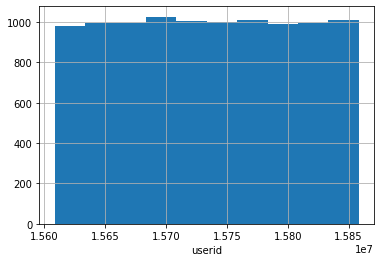

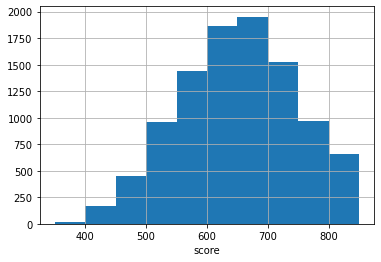

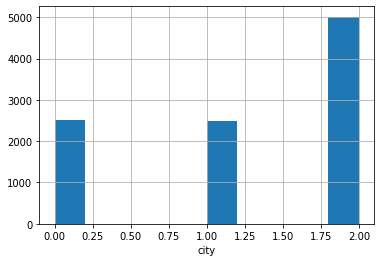

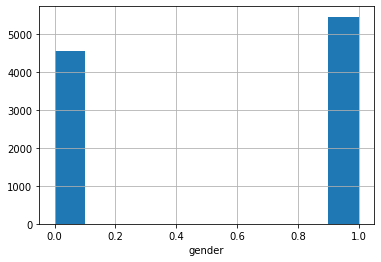

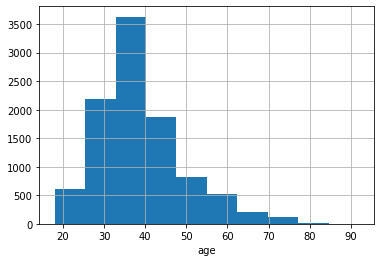

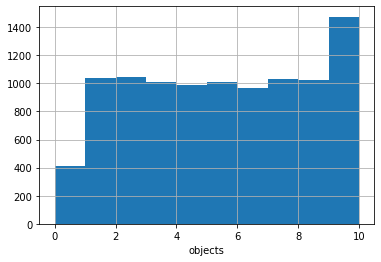

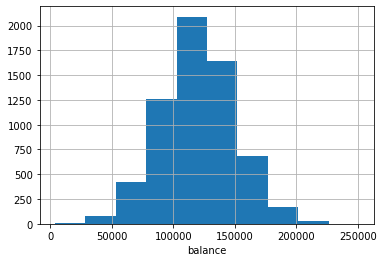

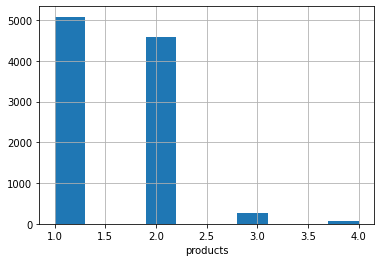

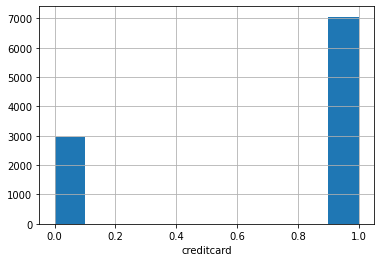

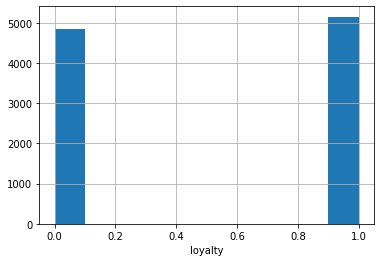

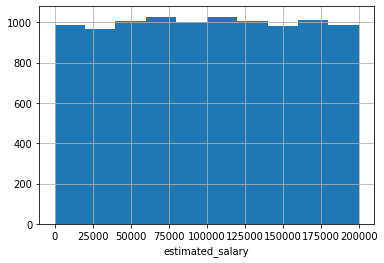

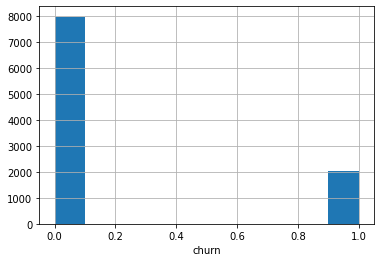

In [20]:
# Гистограммы для всех столбцов
for column in bank_data.columns:
    bank_data[column].hist(bins=10)
    plt.xlabel(column)
    plt.show()

Примечательно распределение столбцов 'objects' и 'estimated_salary' - практически равномерное, при том, что в нашем мире распределение доходов и количество имущества в собственности сильно неравномерное.

Также примечательно то, что практически все клиенты банка пользуются 1 (51%) или 2 (46%) продуктами банка (столбец 'products').

Распределение остальных столбцов не вызывает каких либо вопросов. Выбросов так же нет.

**3.2 Исследование зависимости используемых продуктов банка от использования клиентом кредитной карты**

К сожалению по продуктам банка у нас имеется ограниченная информация. У нас есть столбец 'products' с количестом используемых клиентом продуктов, а также 'creditcard' c информацией о том, есть ли у клиента кредитная карта банка (входит в число 'products'). Посмотрим на распределение:

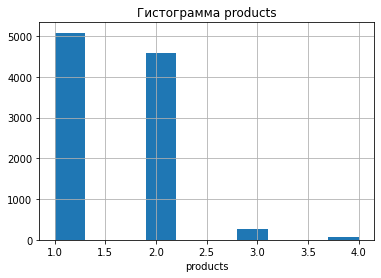

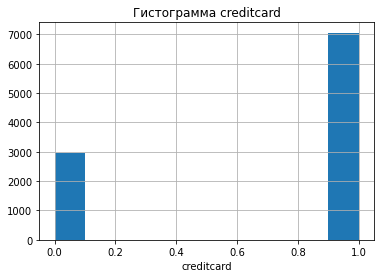

In [21]:
# Гистограммы 'products' и 'creditcard'
for column in ['products', 'creditcard']:
    bank_data[column].hist(bins=10)
    plt.title('Гистограмма ' + column)
    plt.xlabel(column)
    plt.show()

Как мы видим, кредитная карта есть у 70 % пользователей банка, а пользуется клиенты в основном 1 или 2 продуктами. Посмотрим на распределение количества используемых продуктов банка у пользователей с картой и без карты

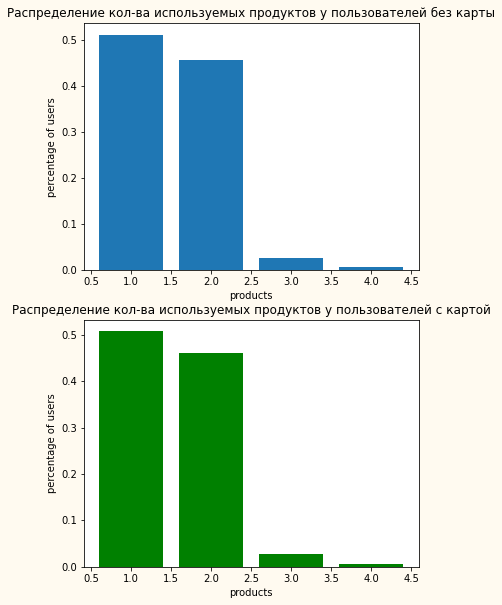

In [22]:
x = np.arange(1, 5)
data_1 = (bank_data[bank_data['creditcard'] == 0].\
    groupby('products')['userid'].count() / bank_data[bank_data['creditcard'] == 0]['userid'].count())
data_2 = bank_data[bank_data['creditcard'] == 1].\
    groupby('products')['userid'].count() / bank_data[bank_data['creditcard'] == 1]['userid'].count()


fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6, 10))

ax1.bar(x, data_1, label='Нет кредитной карты')
ax2.bar(x, data_2, label='Есть кредитная карта', color='green')

fig.set_facecolor('floralwhite')

ax1.set_title('Распределение кол-ва используемых продуктов у пользователей без карты')
ax1.set_xlabel('products')
ax1.set_ylabel('percentage of users')

ax2.set_title('Распределение кол-ва используемых продуктов у пользователей с картой')
ax2.set_xlabel('products')
ax2.set_ylabel('percentage of users')
plt.show()

Как мы видим, количество используемых продуктов банка не зависит от факта наличия кредитной карты

**3.3 Исследование зависимости дохода и собственности от возраста и пола клиента**

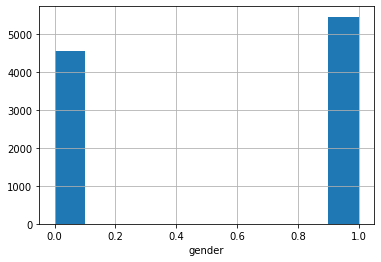

In [23]:
# Распределение клиентов банка по полу
# Значения: 0 - Женщины, 1 - Мужчины
bank_data['gender'].hist()
plt.xlabel('gender')
plt.show()

Клиентов-мужчин несколько больше, чем клиентов-женщин. Отношение 55% к 45%.

In [24]:
print('Средний возраст у клиентов-мужчин:', round(bank_data[bank_data['gender'] == 1]['age'].mean(), 2))
print('Средний возраст у клиентов-женщин:', round(bank_data[bank_data['gender'] == 0]['age'].mean(), 2))
print()
print('Средний доход у клиентов-мужчин:', round(bank_data[bank_data['gender'] == 1]['estimated_salary'].mean(), 2))
print('Средний доход у клиентов-женщин:', round(bank_data[bank_data['gender'] == 0]['estimated_salary'].mean(), 2))
print()
print('Среднее количество объектов собственности у клиентов-мужчин:', \
      round(bank_data[bank_data['gender'] == 1]['objects'].mean(), 2))
print('Средний количество объектов собственности у клиентов-женщин:', \
      round(bank_data[bank_data['gender'] == 0]['objects'].mean(), 2))

Средний возраст у клиентов-мужчин: 38.66
Средний возраст у клиентов-женщин: 39.24

Средний доход у клиентов-мужчин: 99664.58
Средний доход у клиентов-женщин: 100601.54

Среднее количество объектов собственности у клиентов-мужчин: 5.05
Средний количество объектов собственности у клиентов-женщин: 4.97


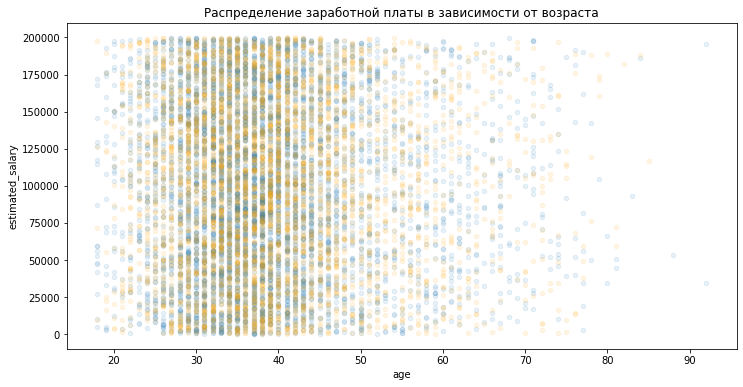

In [25]:
# График распределения заработной платы в зависимости от возраста
ax = bank_data[bank_data['gender'] == 1].plot(kind='scatter',
                                                x='age',
                                                y='estimated_salary',
                                                alpha=0.1)
bank_data[bank_data['gender'] == 0].plot(kind='scatter',\
                                           x='age',\
                                           y='estimated_salary',\
                                           color='orange',\
                                           ax=ax,\
                                           figsize=(12,6),\
                                           alpha=0.1)
plt.title('Распределение заработной платы в зависимости от возраста')
plt.show()

На графике распределения заработной платы в зависимости от возраста графики мужчин и женщин имеют одинаковый рисунок. Какой-либо зависимости размера заработной платы от пола не наблюдается.

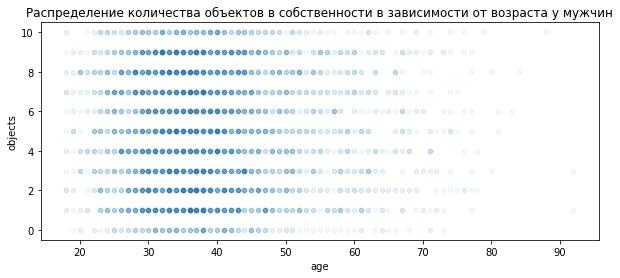

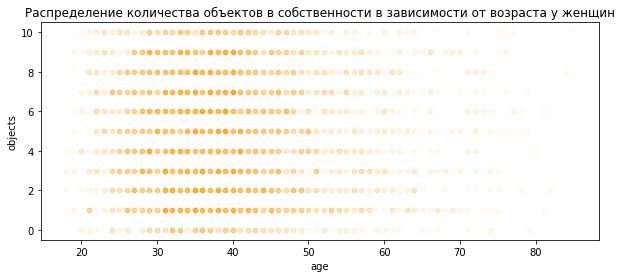

In [26]:
# Графики распределения количества объектов в собственности в зависимости от возраста
bank_data[bank_data['gender'] == 1].plot(kind='scatter',
                                           x='age',
                                           y='objects',
                                           figsize=(10,4),
                                           alpha=0.05)
plt.title('Распределение количества объектов в собственности в зависимости от возраста у мужчин')
plt.show()
bank_data[bank_data['gender'] == 0].plot(kind='scatter',
                                           x='age',
                                           y='objects',
                                           color='orange',
                                           figsize=(10,4),
                                           alpha=0.05)
plt.title('Распределение количества объектов в собственности в зависимости от возраста у женщин')
plt.show()

На графике распределения количества объектов в собственности от возраста графики мужчин и женщин также имеют одинаковый рисунок. Какой-либо зависимости количества объектов в собственности от пола не наблюдается.

Как мы выяснили, у наших клиентов отсутствует зависимость между доходом и количеством собственности с возрастом и полом клиента.

**3.4 Исследование популярности кредитных карт в зависимости от дохода и возраста**

Для данного исследования построим графики

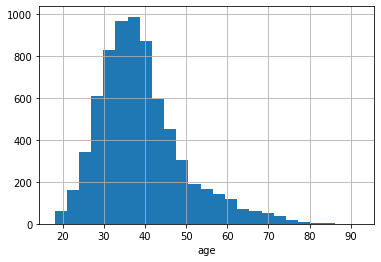

In [27]:
# Распределение клиентов по возрасту
bank_data[bank_data['creditcard'] == 1]['age'].hist(bins=25)
plt.xlabel('age')
plt.show()

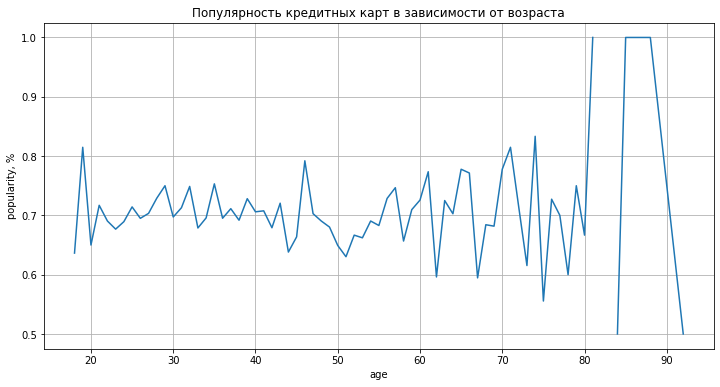

In [28]:
# График популярности кредитных карт в зависимости от возраста
(bank_data[bank_data['creditcard'] == 1].groupby('age')['userid'].count() / bank_data.groupby('age')['userid'].count()).\
    plot(grid=True, figsize=(12,6))
plt.title('Популярность кредитных карт в зависимости от возраста')
plt.xlabel('age')
plt.ylabel('popularity, %')
plt.show()

Как мы видим на графике, популярность кредитных карт среди возрастных групп варьируется в основном от 60% до 80%, с увеличением разброса после 70 лет. Увеличение разброса объясняется значительным уменьшением количества клиентов с возрастом (пик приходится на клиентов 37 лет).

In [29]:
def up_quantile(data):
    '''
    Функция для округления заработной платы в большую сторону до квантиля (шаг 10%)
    '''
    dict = {}
    i = 1
    while i != 0:
        quantile_min = round(data.quantile(q = i-0.1), 2)
        quantile_max = round(data.quantile(q = i), 2)
        for n in range(len(data)):
            if data[n] >= quantile_min and data[n] <= quantile_max:
                dict[n] = quantile_max
        i = round(i - 0.1, 1)
    return dict

dict = up_quantile(bank_data['estimated_salary'])
bank_data['quntile_estimated_salary'] = pd.Series(dict)

# Поспотрим на результат
bank_data.groupby('quntile_estimated_salary')['userid'].count()

quntile_estimated_salary
20273.58     1000
41050.74     1000
60736.08     1000
80238.34     1000
100193.92    1000
119710.04    1000
139432.24    1000
159836.73    1000
179674.70    1000
199992.48    1000
Name: userid, dtype: int64

Получилось 10 равных групп, функция работает корректно.

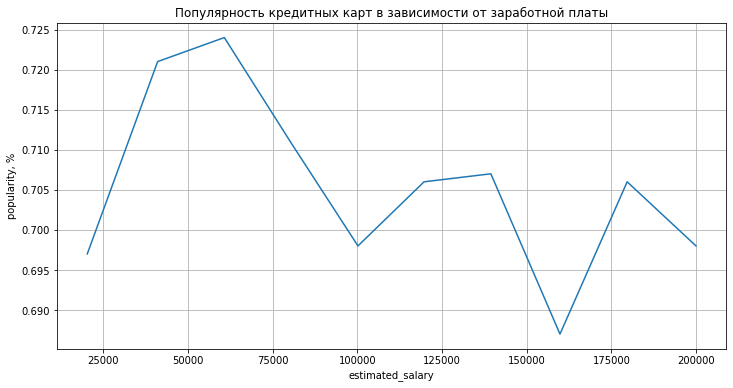

In [30]:
# График популярности кредитных карт в зависимости от заработной платы
(bank_data[bank_data['creditcard'] == 1].groupby('quntile_estimated_salary')['userid'].count() /\
    bank_data.groupby('quntile_estimated_salary')['userid'].count()).plot(grid=True, figsize=(12,6))
plt.title('Популярность кредитных карт в зависимости от заработной платы')
plt.xlabel('estimated_salary')
plt.ylabel('popularity, %')
plt.show()

На данном графике видно незначительное падение популярности кредитных карт с увеличинием дохода (пик популярности у клиентов с доходом около 60000). При этом необходимо отметить, что разброс между наибольшим и наименьшим показателем составляет всего около 3.5%

В общем же можно сказать, что:
    - корреляция между популярностью кредитных карт и возрастом отсутствует;
    - корреляция между популярность кредитных карт и заработной платой очень слаба, имеется незначительное снижение популярности кредитных карт с увеличинием дохода (пик приходится на 60000)

## 4. Сегментация пользователей по количеству потребляемых продуктов
<a id='section3'> <a/>

Вспомним распределение количества потребляемых продуктов среди клиентов

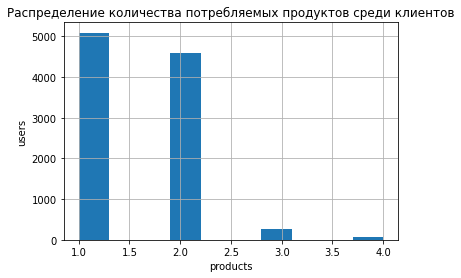

In [31]:
bank_data['products'].hist()
plt.title('Распределение количества потребляемых продуктов среди клиентов')
plt.xlabel('products')
plt.ylabel('users')
plt.show()

Как видно на данной гистограмме, выделяются 2 основные группы: клиенты, пользующиеся 1 продуктом банка и клиенты, пользующиеся 2 продуктами. В связи с тем, что количество клиентов, пользующихся больше чем 2 продуктами незначительно - их можно объединить в одну группу.  
Таким образом мы разделим клиентов на 3 группы:
    - Клиенты, пользующиеся 1 продуктом
    - Клиенты, пользующиеся 2 продуктами
    - Клиенты, пользующиеся больше чем 2 продуктами

In [32]:
def segmentation(row):
    '''
    Функция для сегментации клиентов по количеству используемых продуктов банка
    '''
    if row == 1:
        return 0
    elif row == 2:
        return 1
    elif row > 2:
        return 2 

# Сегментация пользователей с помощью функции segmentation
bank_data['segment'] = bank_data['products'].apply(segmentation)

In [33]:
bank_data.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,quntile_estimated_salary,segment
0,15677338,619,2,0,42,2,NaN,1,1,1,101348.88,1,119710.04,0
1,15690047,608,1,0,41,1,83807.86,1,0,1,112542.58,0,119710.04,0
2,15662040,502,2,0,42,8,159660.80,3,1,0,113931.57,1,119710.04,2
3,15744090,699,2,0,39,1,NaN,2,0,0,93826.63,0,100193.92,1
4,15780624,850,1,0,43,2,125510.82,1,1,1,79084.10,0,80238.34,0


In [34]:
bank_data.groupby('segment')['userid'].count()

segment
0    5084
1    4590
2     326
Name: userid, dtype: int64

Сегментация проведена, теперь в столбце 'segment' указан сегмент, к которому принадлежит клиент.

## 5. Модель прогнозирования оттока пользователей
<a id='section4'> <a/>

In [35]:
# Матрица признаков X. Используем датасет без пропусков
X = bank_data_dropna.drop('churn', axis=1)
# Целевая переменная y
y = bank_data_dropna['churn']

#Преобразование строковых значений столбцов 'city' и 'gender' в числовые
encoder = LabelEncoder()
X['city'] = encoder.fit_transform(X['city'])
X['gender'] = encoder.fit_transform(X['gender'])

# Разделение выборки на обучающую и валидационную. Отношение 80:20
# Параметр stratify = y (где y – целевая переменная), для равного соотношения 0 и 1 в выборках
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=0)

In [36]:
def print_metrics(y_true, y_pred, y_proba, title):
    '''
    Функция для вывода метрик оценки моделей
    '''
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [37]:
# Обучение модели логистической регрессии
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)[:,1]

# Вывод метрик с помощью функции print_metrics
print_metrics(y_test, lr_predictions, lr_probabilities, 'Метрики для модели логистической регрессии:')

Метрики для модели логистической регрессии:
	Accuracy: 0.76
	Precision: 0.00
	Recall: 0.00


In [38]:
print('Количество предсказанных ушедших клиентов:', lr_predictions.sum())
print('Количество реальных ушедших клиентов:', y_test.sum())

Количество предсказанных ушедших клиентов: 0
Количество реальных ушедших клиентов: 307


Модель предсказала все 0. Это произошло из-за того, что классы не сбалансированы. Посмотрим на вероятности

In [39]:
y_LogisticRegression = pd.DataFrame(y_test).rename(columns={'churn':'true'})

y_LogisticRegression['pred'] = lr_predictions
y_LogisticRegression['proba'] = lr_probabilities
y_LogisticRegression.head(10)

,true,pred,proba
5189,1,0,0.236101
3652,0,0,0.258451
2340,0,0,0.233276
2478,0,0,0.238108
6036,0,0,0.238865
704,0,0,0.251296
1733,0,0,0.238358
800,0,0,0.243676
1459,0,0,0.247568
4937,1,0,0.241719


Как мы видим, все вероятности примерно равны. Установить порог вручную не получится. Попробуем другую модель 

In [40]:
# Обучение модели случайного леса
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:,1]

# Вывод метрик с помощью функции print_metrics
print_metrics(y_test, rf_predictions, rf_probabilities, 'Метрики для модели случайного леса:')

Метрики для модели случайного леса:
	Accuracy: 0.83
	Precision: 0.76
	Recall: 0.46


In [41]:
print('Количество предсказанных ушедших клиентов:', rf_predictions.sum())
print('Количество реальных ушедших клиентов:', y_test.sum())

Количество предсказанных ушедших клиентов: 185
Количество реальных ушедших клиентов: 307


Результаты этой модели значительно лучше предыдущей. Посмотрим на вероятности

In [42]:
y_RandomForestClassifier = pd.DataFrame(y_test).rename(columns={'churn':'true'})

y_RandomForestClassifier['pred'] = rf_predictions
y_RandomForestClassifier['proba'] = rf_probabilities
y_RandomForestClassifier.head(10)

,true,pred,proba
5189,1,1,0.90
3652,0,0,0.07
2340,0,0,0.28
2478,0,0,0.28
6036,0,0,0.02
704,0,0,0.09
1733,0,0,0.04
800,0,1,0.83
1459,0,0,0.08
4937,1,1,0.93


У данной модели так же сложно установить порог вероятности, т.к. зачастую вероятности реальных 0 и 1 совпадают. При проведении эксперементов с понижением порога сильно росло количество ложноположительных результатов.  Увеличение порога - к увеличению ложноотрицательных результатов. Остановимся на данной модели.

## 6. Проверка гипотезы
<a id='section5'> <a/>

**Гипотеза:** Клиенты, пользующимися двумя продуктами банка имеют больший доход, чем клиенты пользующимся одним продуктом банка.

Нулевая гипотеза: Доход клиентов, пользующимся одним продуктом банка, и клиентов, пользующимся двумя продуктами банка, равен.
Альтернативная гипотеза: Доход клиентов, пользующимся одним продуктом банка, и клиентов, пользующимся двумя продуктами банка, различается.

In [43]:
# Датафрейм с клиентами, пользующимися 1 продуктом
users_1_products = bank_data[bank_data['products'] == 1]
# Датафрейм с клиентами, пользующимися 2 продуктами
users_2_products = bank_data[bank_data['products'] == 2]

alpha = 0.05   # критический уровень статистической значимости

results = st.ttest_ind(
    users_1_products['estimated_salary'], 
    users_2_products['estimated_salary'])

print('p-значение:', round(results.pvalue, 4))

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.4105
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу, следовательно доход клиентов, пользующимся одним продуктом банка, и клиентов, пользующимся двумя продуктами банка, равен.  
Гипотеза о неравенстве доходов не подтвердилась.

## Вывод
<a id='section6'> <a/>

В данной работе проведено исследование данных клиентов Метанпромбанка. Исследованы:  зависимость используемых продуктов банка от использования клиентом кредитной карты, зависимость дохода и объема собственности от возраста и пола клиента, популярность кредитных карт в зависимости от дохода и возраста.

По проведенным исследованиям сделаны следующие выводы:
- Количество используемых продуктов банка не зависит от факта наличия кредитной карты;
- Зависимость между доходом и количеством собственности с возрастом и полом клиентов банка отсутствует;
- Корреляция между популярностью кредитных карт и возрастом отсутствует;
- Корреляция между популярность кредитных карт и заработной платой очень слаба, имеется незначительное снижение популярности кредитных карт с увеличинием дохода (пик приходится на 60000).

Так же в работе проведена сегментация пользователей по количеству используемых продуктов банка. Клиенты были разделены на 3 группы:
    - Клиенты, пользующиеся 1 продуктом
    - Клиенты, пользующиеся 2 продуктами
    - Клиенты, пользующиеся больше чем 2 продуктами

В завершении построена модель прогнозирования оттока пользователей. Наиболее успешной себя показала модель RandomForestClassifier (Accuracy: 0.83, Precision: 0.76, Recall: 0.46). Понижение порога вело к увеличению ложноположительных результатов, увеличение порога - к увеличению ложноотрицательных результатов.


Дополнение о изученных данных: представленная информация искусственна, т.к. отсутствуют закономерности между данными.